# Check grids

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from scipy import interpolate

In [4]:
from libradtranpy import  libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Configuration

In [6]:
file1_in = f"atmospherictransparencygrid_rayleigh_training.npy"
file2_in = f"atmospherictransparencygrid_rayleigh_test.npy"

In [7]:
file3_in = f"atmospherictransparencygrid_O2abs_training.npy"
file4_in = f"atmospherictransparencygrid_O2abs_test.npy"

In [8]:
file5_in = f"atmospherictransparencygrid_PWVabs_training.npy"
file6_in = f"atmospherictransparencygrid_PWVabs_test.npy"

In [9]:
file7_in = f"atmospherictransparencygrid_OZabs_training.npy"
file8_in = f"atmospherictransparencygrid_OZabs_test.npy"

### wavelength

In [10]:
WLMIN=300.
WLMAX=1100.
WLBIN=1.
NWLBIN=int((WLMAX-WLMIN)/WLBIN)
WL=np.linspace(WLMIN,WLMAX,NWLBIN)

### airmass

In [11]:
AIRMASSMIN=1.0
AIRMASSMAX=2.6
#AIRMASSMAX=1.1
DAM = 0.1

In [12]:
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [13]:
airmasses

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5])

In [14]:
NAM=len(airmasses)

In [15]:
sequential_colors = sns.color_palette("hls", NAM)

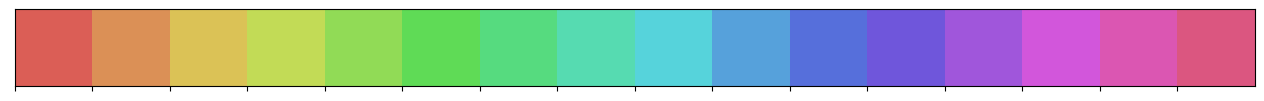

In [16]:
sns.palplot(sequential_colors)

In [17]:
airmass_training = airmasses
airmass_test = airmasses + DAM/2.

In [18]:
NX=len(airmasses)
NY=NWLBIN

### PWV

In [19]:
PWVMIN = 0
PWVMAX = 11
DPWV = 0.5

In [20]:
pwv_training = np.arange(PWVMIN,PWVMAX,DPWV)
pwv_test = pwv_training + DPWV/2.

In [21]:
NPWV = len(pwv_training)

### OZON

In [22]:
OZMIN = 0
OZMAX = 600
DOZ   = 100

In [23]:
oz_training = np.arange(OZMIN,OZMAX,DOZ)
oz_test = oz_training  + DOZ/2.

In [24]:
NOZ = len(oz_training)

### Data

In [25]:
with open(file1_in, 'rb') as f:
    data_rayleigh_training=np.load(f)
with open(file2_in, 'rb') as f:    
    data_rayleigh_test=np.load(f)
with open(file3_in, 'rb') as f:  
    data_O2abs_training=np.load(f)
with open(file4_in, 'rb') as f:     
    data_O2abs_test=np.load(f)

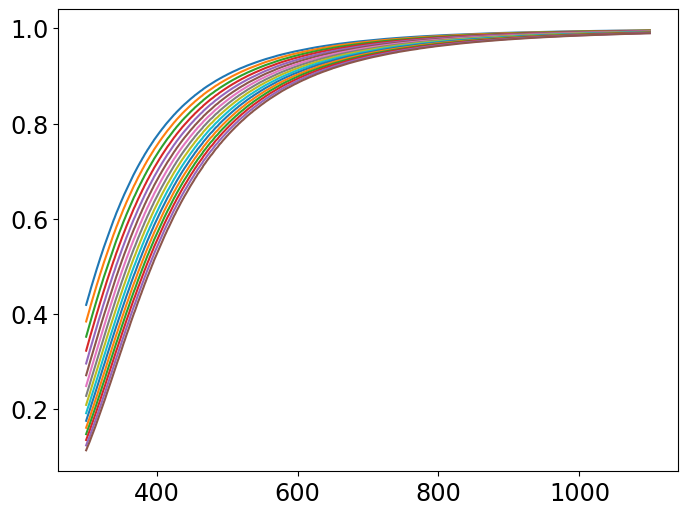

In [35]:
plt.plot(WL,data_rayleigh_training[:,:]);

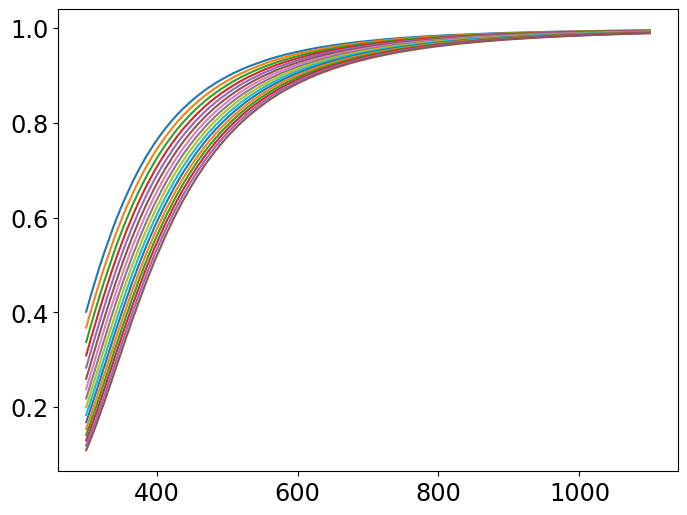

In [34]:
plt.plot(WL,data_rayleigh_test[:,:]);

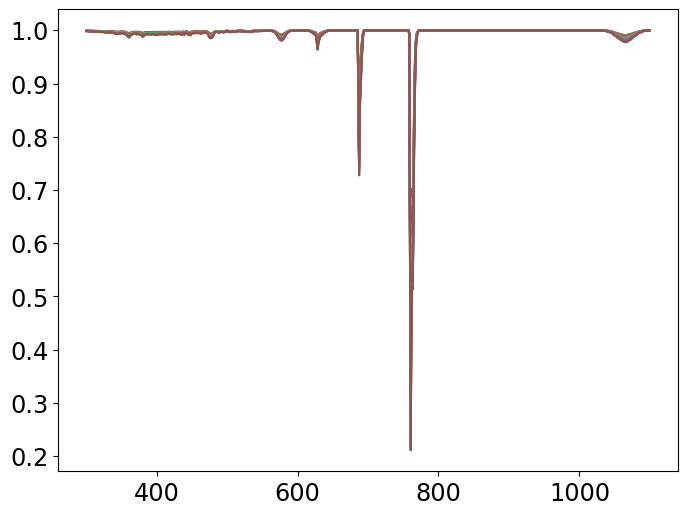

In [36]:
plt.plot(WL,data_O2abs_training[:,:]);

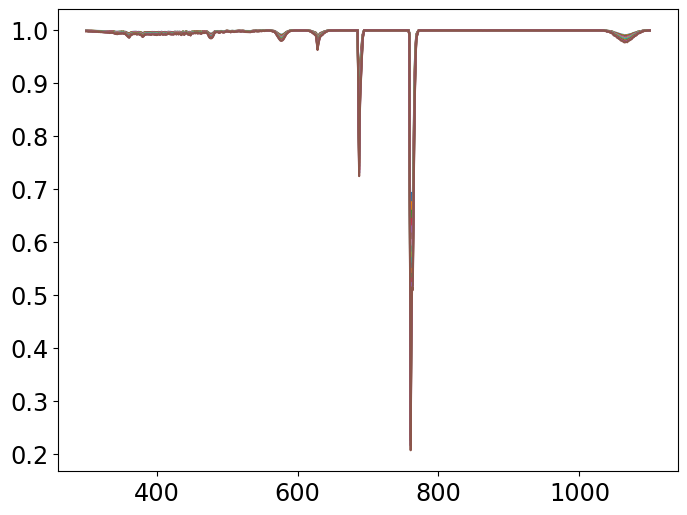

In [38]:
plt.plot(WL,data_O2abs_test[:,:]);

In [26]:
with open(file5_in, 'rb') as f:
    data_H2Oabs_training=np.load(f)
with open(file6_in, 'rb') as f:
    data_H2Oabs_test=np.load(f)

In [27]:
with open(file7_in, 'rb') as f:
    data_OZabs_training=np.load(f)
with open(file8_in, 'rb') as f:    
    data_OZabs_test=np.load(f)

In [39]:
data_H2Oabs_training.shape

(800, 16, 22)

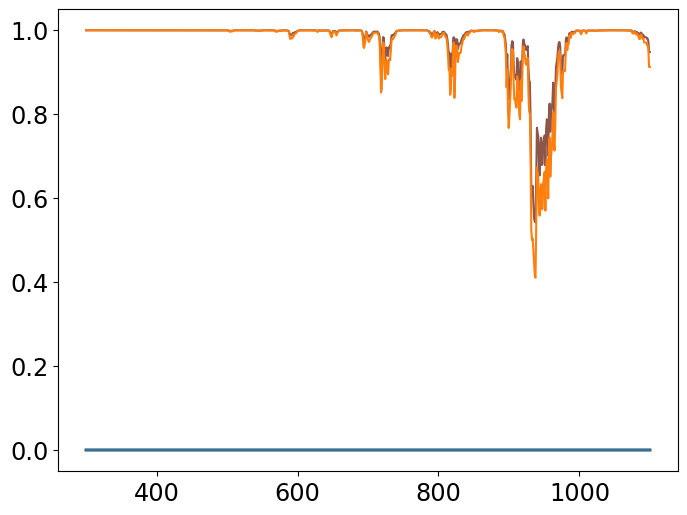

In [46]:
plt.plot(WL,data_H2Oabs_training[:,:,5]);
plt.plot(WL,data_H2Oabs_training[:,:,9]);